In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
df = pd.read_csv('C:/Users/secre/Desktop/bigcon/champ/weather/weather_sb.csv', encoding='cp949')

In [3]:
hour = np.zeros(len(df))
df['hour'] = hour
for i in range(len(df)):
    df['hour'][i] = datetime.datetime.strptime(str(df.Time[i]),'%H:%M:%S').hour

month = np.zeros(len(df))
df['month'] = month
for i in range(len(df)):
    df['month'][i] = datetime.datetime.strptime(str(df.Date[i]),'%Y%m%d').month
    
day = np.zeros(len(df))
df['day'] = day
for i in range(len(df)):
    df['day'][i] = datetime.datetime.strptime(str(df.Date[i]),'%Y%m%d').day

C:\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\conda\envs\tf\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
df['노출(분)'] = df['노출(분)'].fillna(method='ffill')
df = df[df.판매단가 != 0]
df = df[df.취급액 != 50000]

In [5]:
df['volume'] = df.취급액 / df.판매단가

C:\conda\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\conda\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


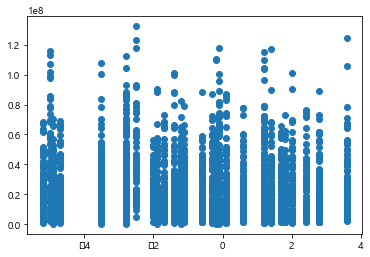

In [6]:
jan = df[df.month == 1]
plt.scatter(jan.aver_s, jan.취급액)
plt.show()

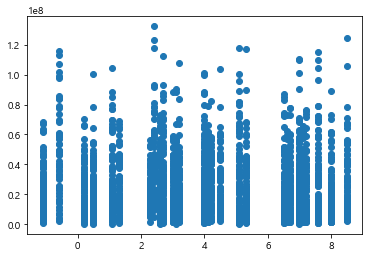

In [7]:
plt.scatter(jan.high_s, jan.취급액)
plt.show()

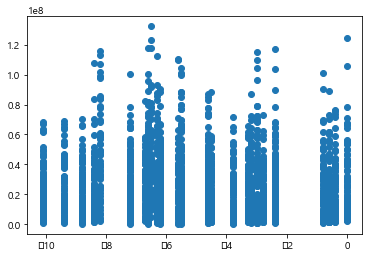

In [8]:
plt.scatter(jan.low_s, jan.취급액)
plt.show()

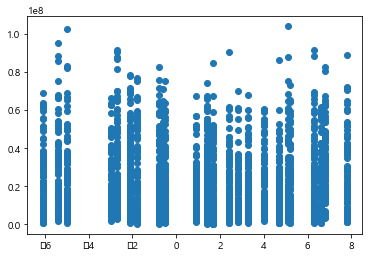

In [9]:
feb = df[df.month ==2]
plt.scatter(feb.aver_s, feb.취급액)
plt.show()

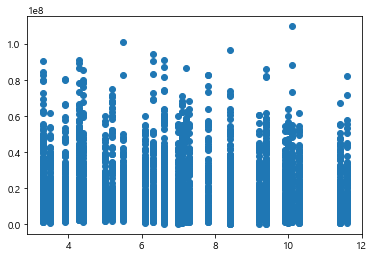

In [10]:
mar = df[df.month == 3]
plt.scatter(mar.aver_s, mar.취급액)
plt.show()

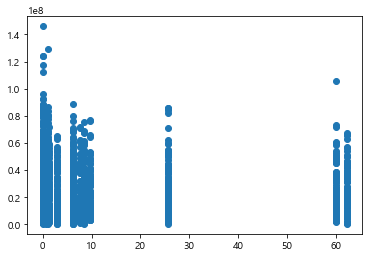

In [11]:
jul = df[df.month == 7]
plt.scatter(jul.rain_s, jul.취급액)
plt.show()

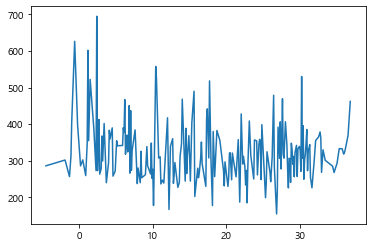

In [12]:
df2 = df.groupby('high_s').volume.mean().reset_index()
plt.plot(df2.high_s, df2.volume)
plt.show()

In [13]:
temp = []

for i in range(len(df)):
    if df.hour.values[i]==6:
        temp.append(df.low_s.values[i])
    elif df.hour.values[i]==7:
        temp.append(df.low_s.values[i])
    elif df.hour.values[i]==8:
        temp.append(df.low_s.values[i])
    elif df.hour.values[i]==13:
        temp.append(df.high_s.values[i])
    elif df.hour.values[i]==14:
        temp.append(df.high_s.values[i])
    elif df.hour.values[i]==15:
        temp.append(df.high_s.values[i])
    else:
        temp.append(df.aver_s.values[i])

In [14]:
df['temp'] = temp

C:\conda\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\conda\envs\tf\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


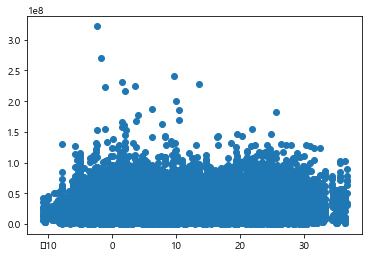

In [16]:
plt.scatter(df.temp, df.취급액)
plt.show()

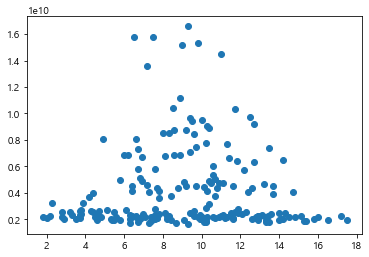

In [20]:
diff = np.zeros(len(df.Date))
df['temp_diff'] = diff

df['temp_diff'] = df.high_s - df.low_s
a = df.groupby('temp_diff').취급액.sum().reset_index()
plt.scatter(a.temp_diff, a.취급액)
plt.show()

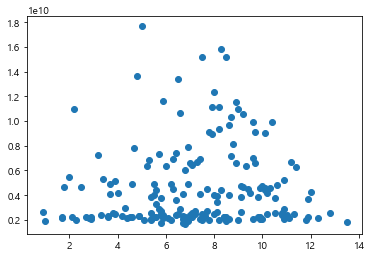

In [21]:
diff = np.zeros(len(df.Date))
df['temp_diff_b'] = diff

df['temp_diff_b'] = df.high_b - df.low_b
a = df.groupby('temp_diff_b').취급액.sum().reset_index()
plt.scatter(a.temp_diff_b, a.취급액)
plt.show()

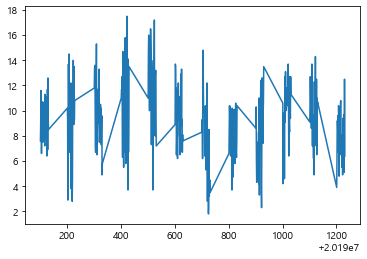

In [22]:
plt.plot(df.Date, df.temp_diff)
plt.show()

In [23]:
df.corr(method='pearson')

,Date,노출(분),마더코드,상품코드,판매단가,취급액,bad_s_noon,bad_b_noon,bad_s_dinner,bad_b_dinner,...,low_b,rain_b,hour,month,day,volume,temp,temo_diff,temp_diff,temp_diff_b
Date,1.000000,-0.041337,-0.081217,-0.096807,-0.045103,0.070984,0.201871,0.204628,0.201025,0.204545,...,0.341409,0.047037,-0.012672,0.953706,0.022291,0.071650,0.254970,-0.143213,-0.143213,-0.167593
노출(분),-0.041337,1.000000,0.090081,0.081658,0.135404,0.046095,0.011951,0.011919,0.012687,0.011962,...,0.014285,0.004088,-0.004366,-0.042497,-0.009814,-0.055469,0.010205,-0.018392,-0.018392,-0.009836
마더코드,-0.081217,0.090081,1.000000,0.977926,-0.205652,-0.054361,-0.073617,-0.072444,-0.073837,-0.072557,...,-0.098459,-0.031274,-0.099454,-0.085851,0.017083,-0.002435,-0.114842,0.006641,0.006641,0.046648
상품코드,-0.096807,0.081658,0.977926,1.000000,-0.217107,-0.041807,-0.086818,-0.085523,-0.087076,-0.085650,...,-0.115430,-0.034707,-0.101219,-0.102004,0.012451,0.007827,-0.133284,0.009855,0.009855,0.056125
판매단가,-0.045103,0.135404,-0.205652,-0.217107,1.000000,-0.161539,0.003199,0.003622,0.003428,0.003543,...,0.035768,0.018763,0.332901,-0.044226,-0.063044,-0.369401,0.038114,0.003658,0.003658,-0.004902
취급액,0.070984,0.046095,-0.054361,-0.041807,-0.161539,1.000000,-0.006947,-0.007419,-0.007027,-0.007088,...,-0.031287,-0.000943,0.078525,0.068203,0.027864,0.763099,-0.021964,-0.040327,-0.040327,0.001491
bad_s_noon,0.201871,0.011951,-0.073617,-0.086818,0.003199,-0.006947,1.000000,0.999317,0.999808,0.999215,...,0.776598,0.215101,-0.004276,0.212791,0.004533,0.016314,0.745624,-0.252228,-0.252228,-0.522297
bad_b_noon,0.204628,0.011919,-0.072444,-0.085523,0.003622,-0.007419,0.999317,1.000000,0.999120,0.999777,...,0.777887,0.209312,-0.004289,0.215616,0.006500,0.016226,0.743924,-0.258794,-0.258794,-0.519579
bad_s_dinner,0.201025,0.012687,-0.073837,-0.087076,0.003428,-0.007027,0.999808,0.999120,1.000000,0.999035,...,0.776536,0.214970,-0.004125,0.211910,0.004470,0.016205,0.745778,-0.252013,-0.252013,-0.523053
bad_b_dinner,0.204545,0.011962,-0.072557,-0.085650,0.003543,-0.007088,0.999215,0.999777,0.999035,1.000000,...,0.778976,0.214480,-0.004224,0.215484,0.008238,0.016781,0.744355,-0.262991,-0.262991,-0.523954


In [ ]:
## 일교차 / 서울최고기온 / 강수량 categorical 이 제일 나은듯..